In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)


In [3]:
csv_path = "Resources/drug_death_data_clean.csv" 
clean_data = pd.read_csv(csv_path)
clean_data.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine Not Heroin,Hydromorphone,Other,MannerofDeath
0,1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
1,2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,NaN,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
2,3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,NaN,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
3,4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,NaN,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
4,5,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,HARTFORD,Residence,NaN,Inhalation,Residence,NaN,NaN,NaN,Heroin Intoxication,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident


In [4]:
gender_data = clean_data.groupby(["Race"])["ID"]
gender_data = gender_data.count()

gender_data.reset_index()
gender_data.head(11)

Race
Asian Indian                14
Asian, Other                18
Black                      415
Chinese                      2
Hawaiian                     1
Hispanic, Black             21
Hispanic, White            525
Native American, Other       1
Other                       10
Unknown                     21
White                     3892
Name: ID, dtype: int64

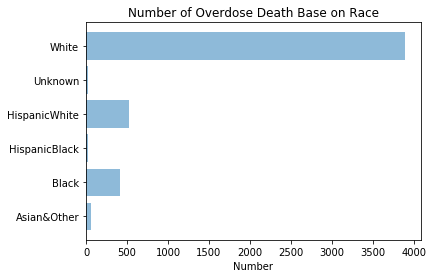

In [55]:
objects = ('Asian&Other', 'Black', 'HispanicBlack', 'HispanicWhite', 'Unknown', 'White')
y_pos = np.arange(len(objects))
number = [56,415,21,525,21,3892]

plt.barh(y_pos, number, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number')
plt.title('Number of Overdose Death Base on Race')
plt.savefig("race1.png")

plt.show()

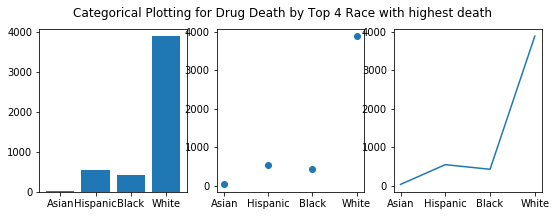

In [56]:
#Plotting base on Highest rate of death base of race
names =['Asian', 'Hispanic', 'Black', 'White']
values = [32, 546, 425, 3892]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting for Drug Death by Top 4 Race with highest death')
plt.savefig("race2.png")
plt.show()

In [ ]:
plot_name = [("Asian&Other","o","red"),
             ("Black","^","blue"),
             ("Hispanic","s","green"),
             ("White","d","black")]


for drug, marker, colors in plot_name:
    t_df = plot name
    t_plot = plt.errorbar(reformat_df.index, reformat_df[drug], t_error,
                         linewidth=0.75,marker=marker,ls='--',color=colors)

#plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()

plt.show()


In [41]:
# Analyzing Sex Demographics
#df = drug_data.drop_duplicates(subset='SN', keep="first")
city_group = clean_data.groupby(["ResidenceCity"])
total_count = clean_data["Sex"].count()
total_male = clean_data["Sex"].value_counts()['Male']
total_female = clean_data["Sex"].value_counts()['Female']


#Calculating the percentage count, Data input
male_count = (total_male / total_count) * 100
female_count = (total_female / total_count) * 100

# Create DataFrame
sex_summary = pd.DataFrame({"": ['Male', 'Female'],
                              "Percentage of Total Death(Sex)": [male_count, female_count],
                              "Total Counts": [total_male, total_female]})


# Formatting DataFrame
sex_summary["Percentage of Total Death(Sex)"] = sex_summary["Percentage of Total Death(Sex)"].map("{:.2f}%".format)

sex_summary

,,Percentage of Total Death(Sex),Total Counts
0,Male,74.04%,3643
1,Female,25.93%,1276


In [8]:
# CALCULATING AGE DEMOGRAPHICS
# Binning
bins = [0, 14, 24, 34, 44, 54, 64, 74, 100]
#Create names for bins
group_names = ['<10', '10-24', '25-34', '35-44', '45-54', '55-64', '65-74', '80+']

#Adding bins to DataFrame
bin_names = clean_data.copy()
bin_names["Age Groups"] = pd.cut(bin_names["Age"], bins, labels=group_names)
bin_group = bin_names.groupby(["Age Groups"])
bin_group

# Create Data input
count_df = bin_group["Race"].count()
count_bins = clean_data["Race"].count()
percentage_group = (count_df / count_bins) * 100
percentage_group

# Creating the DataFrame
demographic_summary = pd.DataFrame({"Total Count": count_df,
                                    "Percentage of Total Death": percentage_group})  

# Formating DataFrame percentage
demographic_summary["Percentage of Total Death"] = demographic_summary["Percentage of Total Death"].map("{:.2f}%".format)
                    
demographic_summary



,Total Count,Percentage of Total Death
Age Groups,,
<10,1,0.02%
10-24,397,8.07%
25-34,1189,24.17%
35-44,1168,23.74%
45-54,1277,25.96%
55-64,766,15.57%
65-74,116,2.36%
80+,6,0.12%


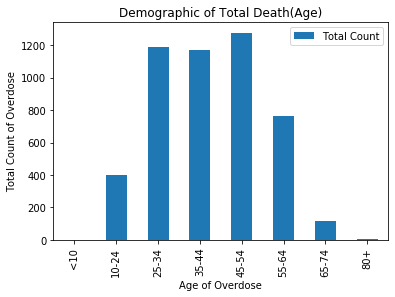

In [47]:
count_chart = demographic_summary.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Age of Overdose")
count_chart.set_ylabel("Total Count of Overdose")
count_chart.set_title("Demographic of Total Death(Age)")

plt.savefig("chart.png")

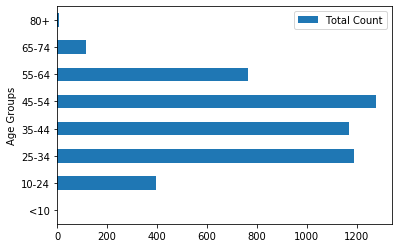

In [64]:
count_chart = demographic_summary.plot(kind='barh')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Age of Overdose")
count_chart.set_ylabel("Total Count of Overdose")
count_chart.set_title("Demographic of Total Death(Age)")

plt.savefig("chart1.png")

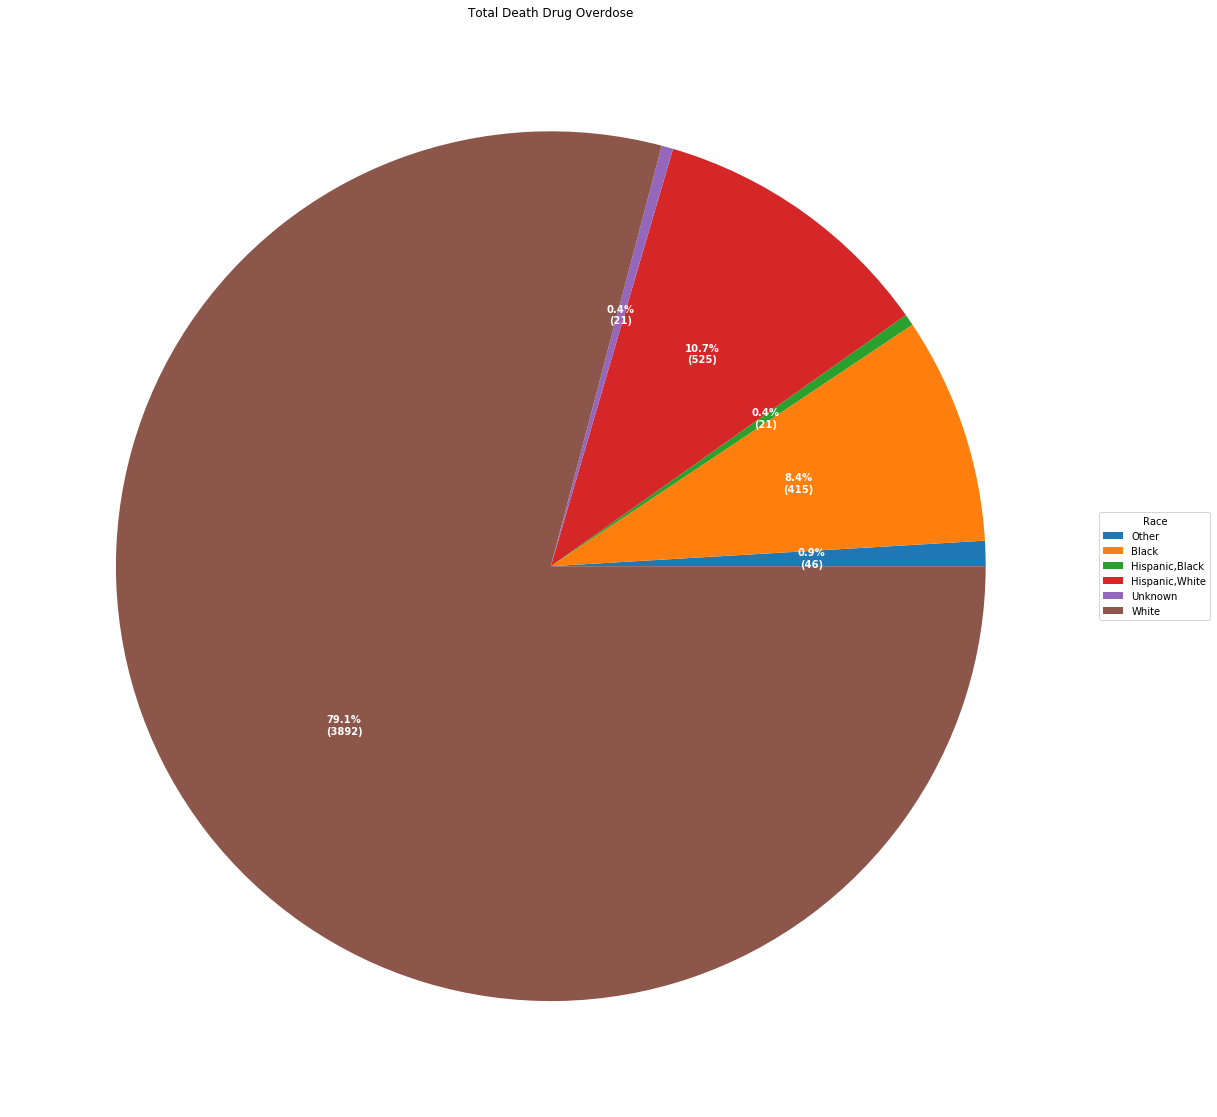

In [61]:
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))

race = ["46 Asian & Other","415 Black",
        "21 Hispanic,Black",
        "525 Hispanic,White",
        "21 Unknown","3892 White"]


data = [float(x.split()[0]) for x in race]
number = [x.split()[-1] for x in race]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, number,
          title="Race",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Total Death Drug Overdose")
plt.savefig("pie.png")
plt.show()



In [12]:
group_df = clean_data.groupby(["Age","Sex","Race"])["Heroin","Cocaine","Fentanyl","Oxycodone",
                                                   "Oxymorphone","Ethanol","Hydrocodone","Benzodiazepine","Methadone",
                                                   "Amphetamine","Tramadol","Morphine Not Heroin","Hydromorphone","Other"]
count_df = group_df.count()
count_df = count_df.reset_index()

# Preview DataFrame
count_df.head(25)

,Age,Sex,Race,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine Not Heroin,Hydromorphone,Other
0,14.0,Female,White,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15.0,Male,White,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,16.0,Male,White,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,17.0,Female,White,3,2,4,0,0,0,0,1,0,0,0,0,0,0
4,17.0,Male,"Hispanic, White",0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,17.0,Male,White,2,0,0,1,1,1,0,2,0,1,0,0,0,1
6,18.0,Female,White,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,18.0,Male,White,5,2,4,2,2,0,0,4,0,1,0,0,0,2
8,19.0,Female,Black,0,0,1,0,0,0,0,1,0,0,0,0,0,0
9,19.0,Female,Unknown,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
group_injury = clean_data.groupby(["Sex"])["Heroin"]

                                                  
injury_df = group_injury.count()
injury_df = injury_df.reset_index()

# Preview DataFrame
injury_df.head(15)

,Sex,Heroin
0,Female,516
1,Male,1921
2,Unknown,0
